# Partial I: Wave Eqaution 1D and Source
## Pedro Luis Artunduaga Ortiz
## Código: 1007761273

# Wave Equation
## $$ \nabla^{2} \phi(x,t) - \frac{1}{c^{2}}\partial^{2}_{t} \phi(x,t) = \mathcal{S}(x,t) $$

## Discratization:
* $dx=dt=ds$
### Time derivative
$$ \partial^{2}_{t} \phi(x,t) = \frac{ \phi(x,t+ds) - 2\phi(x,t) + \phi(x,t-ds)  }{ds^{2}} $$ 
### Spacial derivative
$$ \partial^{2}_{x} \phi(x,t) = \frac{ \phi(x+ds,t) - 2\phi(x,t) + \phi(x-ds,t)  }{ds^{2}} $$ 
### Wave equation discretization

$$ \frac{ \phi(x+ds,t) - 2\phi(x,t) + \phi(x-ds,t)  }{ds^{2}} + \frac{1}{c^{2}} \frac{ \phi(x,t+ds) - 2\phi(x,t) + \phi(x,t-ds)  }{ds^{2}} = \mathcal{S}(x,t) $$

$$ \phi(x,t+ds) = (cds)^{2}\mathcal{S}(x,t) - \phi(x,t-ds) + 2\phi(x,t)(1 + c^{2}) -  c^{2}(\phi(x+ds,t) + \phi(x-ds,t))$$

In [31]:
using Plots

In [32]:
ds = 0.1
lx = 40
lt = 60
x = [i for i ∈ 0:ds:lx]
t = [i for i ∈ 0:ds:lt]
ϕ = zeros((length(x), length(t)));

In [33]:
function space_index(e::Int, v)::Int
    if e == 0
        return lastindex(v)
    elseif e == lastindex(v)+1
        return 1
    else
        return e
    end
end
function time_index(e::Int)::Int
    if e == 0
        return 1
    else
        return e
    end
end

time_index (generic function with 1 method)

In [34]:
function source(xx, tt)::Real
    if tt == t[10] #|| tt == t[10] + 5
        r = abs(xx - x[1])
        r2 = abs(xx - x[end-5])
        if r < π
           return sin(r)
        elseif r2 < π
           return sinc(r2/5)
        else
            return 0.0
        end
    end
    return 0.0
end
function c(xx)
    #if xx <= 10
    #    return 0.2
    #elseif xx >= 30
    #    return 1
    #else
    #    return 0.5
    #end
    return 1
end

c (generic function with 1 method)

In [35]:
@time for j ∈ 1:length(t)-1, i ∈ 3:length(x)-3
    ϕ[i,j+1] = 2*ϕ[i,j]*(1-(c(x[i])^2)) - ϕ[i,time_index(j-1)] + c(x[i])^2*(ϕ[space_index(i+1,x),j] + ϕ[space_index(i-1,x),j])
    ϕ[i,j+1] += (c(x[i])*ds)^2 *source(x[i],t[j])
end
ϕ = ϕ./maximum(ϕ);

  0.304765 seconds (5.39 M allocations: 86.510 MiB, 6.86% gc time, 7.36% compilation time)


┌ Info: Saved animation to 
│   fn = C:\Users\plao-\OneDrive\university\8th_Unipamplona\Physics\Computational_Physics_II\1rt_period\anim_fps60.gif
└ @ Plots C:\Users\plao-\.julia\packages\Plots\AAjgN\src\animation.jl:139


Plots.AnimatedGif("C:\\Users\\plao-\\OneDrive\\university\\8th_Unipamplona\\Physics\\Computational_Physics_II\\1rt_period\\anim_fps60.gif")
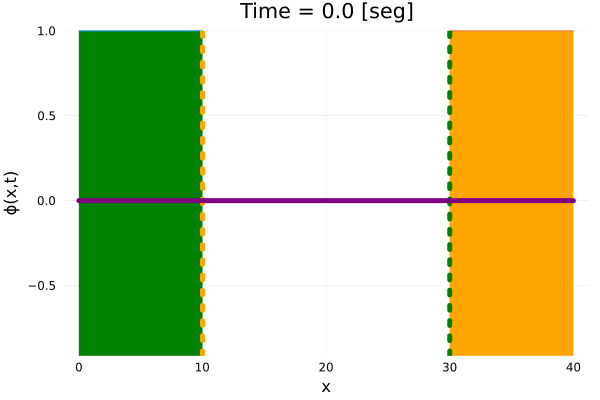

In [36]:
anim = @animate for i in 1:length(t)
    plot([0, 10], [1, 1], fill = (minimum(ϕ), :green), label=:none)
    plot!([30, 40], [1, 1], fill = (minimum(ϕ), :orange), label=:none)
    plot!([10], seriestype="vline", linewidth=5, linestyle=:dot, color=:orange, label=:none)
    plot!([30], seriestype="vline", linewidth=5, linestyle=:dot, color=:green, label=:none)
    plot!(x, ϕ[:,i], linewidth=5, color=:purple, framestyle=:grid, label=:none)
    ylims!(minimum(ϕ),maximum(ϕ))
    ylabel!("ϕ(x,t)")
    xlabel!("x")
    title!("Time = " * string(round(t[i], digits=2)) * " [seg]")
end
gif(anim, "anim_fps60.gif", fps = 60)